In [8]:
import os
import zipfile
import pandas as pd
from PIL import Image
import pytesseract


In [2]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pytesseract

In [6]:
# Path to the zip file containing image files
zip_file_path = "C:\\Users\\sarath chandra\\data analysis\\mnist.zip"

# Directory where you want to extract the image files
# Replace "path_to_extracted_images_folder" with the actual path
extracted_dir = "C:\\Users\\sarath chandra\\data analysis\\CV\\images"

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the images from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Create a list to store image data
image_data = []

# Process the extracted images and store data in the list
for filename in os.listdir(extracted_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(extracted_dir, filename)
        recognized_text = recognize_alphabet(image_path)
        image_data.append({'Image': filename, 'Recognized Text': recognized_text})

# Create a DataFrame from the image data list
image_df = pd.DataFrame(image_data)

# Print the DataFrame
print(image_df)


Empty DataFrame
Columns: []
Index: []


In [2]:
import numpy as np

In [3]:
def load_mnist_data(datafolder):
    data = []
    labels = []

    for root, _, files in os.walk(datafolder):
        for file in files:
            if file.endswith(".png"):
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as image:
                        # Convert the image to grayscale and then to a numpy array
                        img_array = np.array(image.convert('L'), dtype='uint8')
                        flattened_img = img_array.ravel()
                        data.append(flattened_img)
                    label = os.path.basename(os.path.dirname(image_path))
                    labels.append(label)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    return data, labels
                                  
target_path = r'C:\Users\sarath chandra\data analysis\CV\images\images-CV'
data, labels = load_mnist_data(target_path)

#Create a new dataframe with columns based on the number of pixels in the flattened image
pixelsdf = pd.DataFrame(data, columns=[f'pixel{i}' for i in range(len(data[0]))])

#Create the final dataframe with the 'Label' column
mnist_df = pd.concat([pixelsdf, pd.Series(labels, name='Label')], axis=1)

#Display the vectorized image dataframe
mnist_df.head()
#Get the columns with non-zero values (excluding the 'Label' column)
non_zero_columns = mnist_df.drop('Label', axis=1).columns[mnist_df.drop('Label', axis=1).any()]

#Display the columns with non-zero values
print(non_zero_columns)

Index(['pixel20', 'pixel21', 'pixel22', 'pixel31', 'pixel32', 'pixel33',
       'pixel34', 'pixel35', 'pixel36', 'pixel37',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=710)


In [10]:
mnist_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [11]:
mnist_df.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
mnist_df.shape

(372451, 785)

In [35]:
mnist_df.to_csv('alphabet_images.csv')

In [16]:
mnist_df['Label'].value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

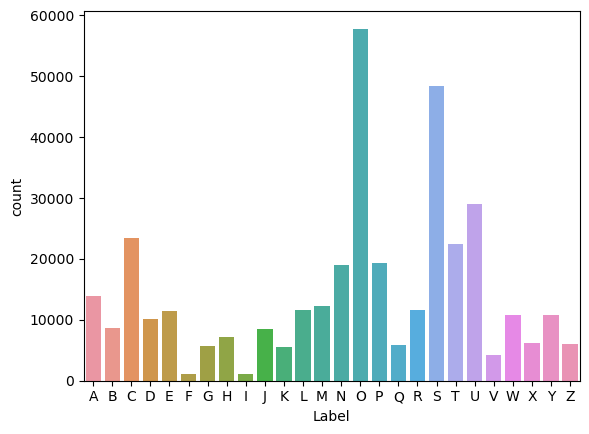

In [18]:
sns.countplot(data=mnist_df,x='Label')

In [19]:
#input variables
X = mnist_df.drop('Label', axis=1)

#output variable
y = mnist_df['Label']

# Train Test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

# model traning and evaluation

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
#prediction
y_test_pred = knn_model.predict(X_test)

C:\Users\sarath chandra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
import sys
import time
from sklearn.metrics import accuracy_score

In [46]:
# evaluation
knn_model_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of knn classifier model is: ",knn_model_accuracy)

Accuracy of knn classifier model is:  0.2503195042582668


# Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\sarath chandra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = lr_model.predict(X_test)
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds")

Prediction time: 3.682420 seconds


In [50]:
lr_model_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of logistic regression classifier model is: ",lr_model_accuracy)

Accuracy of logistic regression classifier model is:  0.32842889822044186


In [51]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
186272,O,O
315826,U,U
63893,E,S
264949,S,S
224093,R,A


# Decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier_model = DecisionTreeClassifier()
dt_classifier_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = dt_classifier_model.predict(X_test)
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds")

Prediction time: 1.234622 seconds


In [55]:
dt_classifier_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of decision tree classifier model is: ",dt_classifier_accuracy)

Accuracy of decision tree classifier model is:  0.9294190929300957


In [39]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
186272,O,O
315826,U,U
63893,E,E
264949,S,S
224093,R,R


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier =RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = rf_classifier.predict(X_test)
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds")

Prediction time: 10.594973 seconds


In [43]:
rf_classifier_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of random forest classifier model is: ",rf_classifier_accuracy)

Accuracy of random forest classifier model is:  0.9777582077690548


In [52]:
import pickle

In [56]:
filename1="dt_classifier_model.sav"
pickle.dump(dt_classifier,open(filename1,'wb'))

In [57]:
loaded_model_lr=pickle.load(open('dt_classifier_model.sav','rb'))